# KDE matrix for Boston housing price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_kdes(df, subtitle):
    """
    Plot KDE by category for all the attributes in data frame
    
    parameters
    df: data frame with a categorical colum at the last row
    subtitile: title to show in KDE plot
    """
    # Generically define how many plots along and across
    ncols = 4
    nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))    # -1 for the last column
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 16)) # 12, 15
    plt.tick_params(
            axis='both',       # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

    # Lazy counter so we can remove unwanted axes
    counter = 1 # if you can change this number to 2, the first two columns are skipped when kde is drawn.
    for i in range(nrows):
        for j in range(ncols):
            
            ax = axes[i][j]

            # Plot when we have data
            if counter < len(df.columns):
                try:
                    # ax.hist(df[df.columns[counter]], bins=10, alpha=0.5, label='{}'.format(df.columns[counter]))
                    # df[df.columns[counter]].plot(kind='kde', label='{}'.format(df.columns[counter]), ax=ax)
                    df[df['category'] == 'Low'][df.columns[counter]].plot(kind='kde', label = 'low', ax=ax)
                    df[df['category'] == 'Medium'][df.columns[counter]].plot(kind='kde', label = 'medium', ax=ax)
                    df[df['category'] == 'High'][df.columns[counter]].plot(kind='kde', label ='high', ax=ax)
                    # ax.set_xlabel('x')
                    # ax.set_ylabel('KDE')
                    # ax.set_ylim([0, 1])
                    ax.set_title('{}'.format(df.columns[counter]))
                    ax.set_xticks
                    leg = ax.legend(loc='upper right')
                    leg.draw_frame(False)    # False
                    
                except:
                    pass

            # Remove axis when we no longer have data
            else:
                ax.set_axis_off()

            counter += 1
    plt.suptitle("{}".format(subtitle), fontsize=13, y=0.03)   
    plt.tight_layout()
    plt.savefig('{}.png'.format(subtitle))
    plt.show();

In [3]:
# Import data
from sklearn import datasets

boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df['category'] = df['target'].apply(lambda x: 'Low' if x < 17 else 'High' if x >=25 else 'Medium')

In [4]:
df['category'].value_counts()

Medium    248
High      132
Low       126
Name: category, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM        506 non-null float64
ZN          506 non-null float64
INDUS       506 non-null float64
CHAS        506 non-null float64
NOX         506 non-null float64
RM          506 non-null float64
AGE         506 non-null float64
DIS         506 non-null float64
RAD         506 non-null float64
TAX         506 non-null float64
PTRATIO     506 non-null float64
B           506 non-null float64
LSTAT       506 non-null float64
target      506 non-null float64
category    506 non-null object
dtypes: float64(14), object(1)
memory usage: 59.4+ KB


In [6]:
# Change the columns order to place the categorial attributes at the first row.
df = df[[ 'category', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target']]
df.head()

,category,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,Medium,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,Medium,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,High,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,High,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,High,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


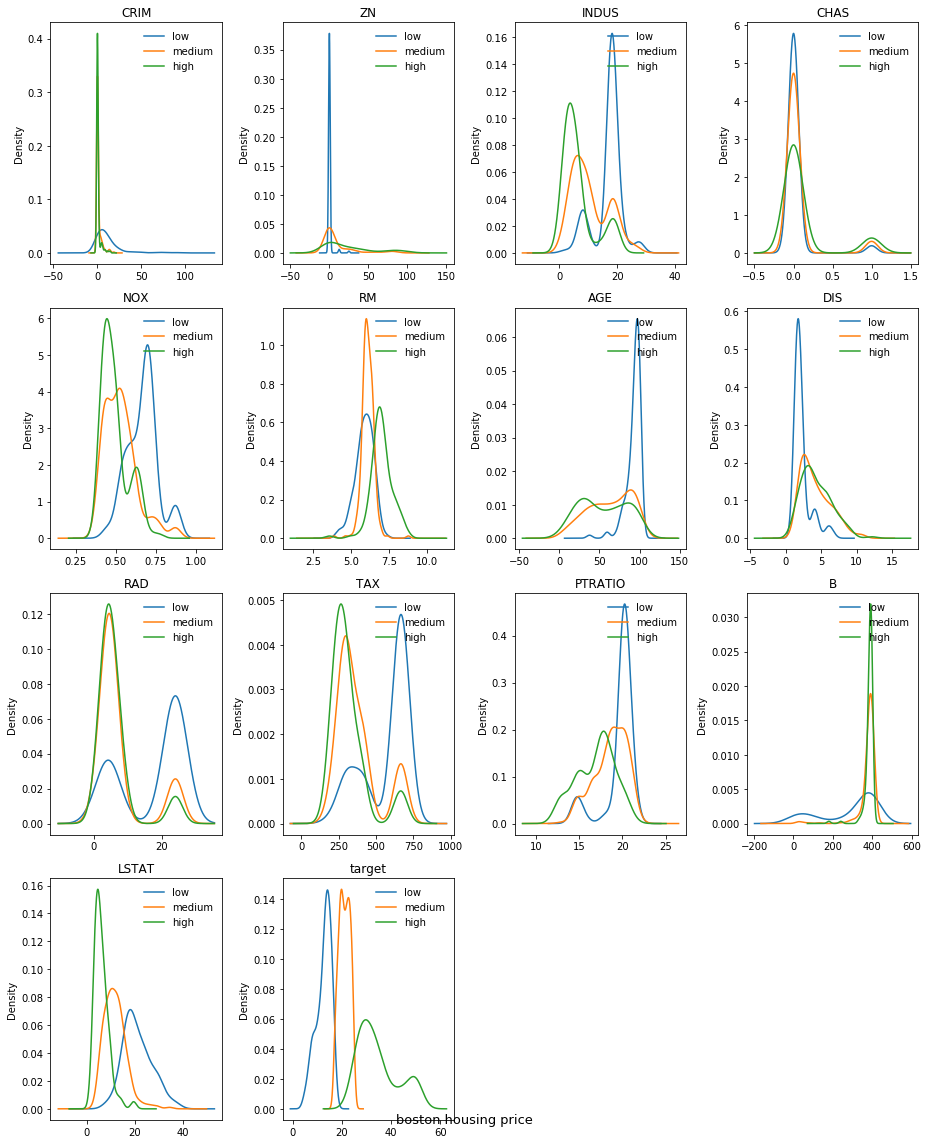

In [7]:
plot_kdes(df, subtitle='boston housing price')